# Import and format BTC price data

In [2]:
import pandas as pd

btc = pd.read_csv("data/BTC-USD.csv")
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,17/05/2021,46415.89844,46623.55859,42207.28906,43537.51172,43537.51172,7.490364e+10
1,18/05/2021,43488.05859,45812.45703,42367.83203,42909.40234,42909.40234,5.618737e+10
2,19/05/2021,42944.97656,43546.11719,30681.49609,37002.44141,37002.44141,1.263580e+11
3,20/05/2021,36753.66797,42462.98438,35050.61719,40782.73828,40782.73828,8.828194e+10
4,21/05/2021,40596.94922,42172.17188,33616.45313,37304.69141,37304.69141,8.205162e+10
5,22/05/2021,37371.03125,38831.05469,35383.68359,37536.63281,37536.63281,5.737727e+10
6,23/05/2021,37531.44922,38289.21875,31227.33984,34770.58203,34770.58203,7.846927e+10


In [5]:
import numpy as np

avgs = []
for i in range(7):
    avgs.append((btc.iloc[i]["High"] + btc.iloc[i]["Low"] + btc.iloc[i]["Open"] + btc.iloc[i]["Close"])  / 4)

avgs

[44696.0644525,
 43644.4374975,
 38543.7578125,
 38762.501955,
 38422.56641,
 37280.600585,
 35454.64746]

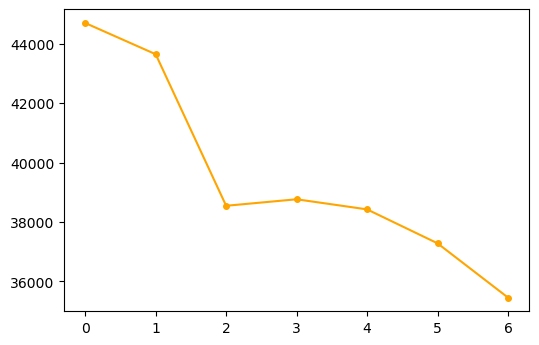

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)

plt.plot(avgs, marker='o', markersize=4, color='orange')

plt.show()

### Adding API sentiment-tagged data

In [7]:
api = pd.read_csv("data/api_tagged.csv").drop(columns=["Unnamed: 0"])
api

,Tweet,Date,Sentiment
0,current stats of delegatedonthate block find p...,2022-05-19,-0.130509
1,bbcworld for all those who be new to this work...,2022-05-19,0.209407
2,smilingpunks floor price no gas fee polygon b...,2022-05-19,0.391721
3,i be claim my free lightning sat from bitcoine...,2022-05-19,0.258565
4,washingtonpost for all those who be new to thi...,2022-05-19,0.209407
...,...,...,...
499995,natashacryptous luna lunaterra lunaburn will h...,2022-05-22,0.322164
499996,cryptocurrencies bitcoin litecoin and ethereum...,2022-05-22,0.197086
499997,cryptocurrencies bitcoin litecoin and ethereum...,2022-05-22,0.197086
499998,this be a big opportunity.made by a very profe...,2022-05-22,0.682156


In [51]:
d18 = api[api["Date"] == "2022-05-18"]
d19 = api[api["Date"] == "2022-05-19"]

print(d18["Sentiment"].mean(), d19["Sentiment"].mean())

0.20257452385564317 0.20129841165122883


In [53]:
import datetime as dt

api["Date"] = pd.to_datetime(api["Date"], format="%Y-%m-%d")

sents = []
for i in range(7):
    t = pd.Timestamp(2022, 5, 17)
    x = api[api["Date"] == t + dt.timedelta(days=i)]
    sents.append(x["Sentiment"].mean())
    
sents

[0.23395597210996708,
 0.20257452385564317,
 0.20129841165122883,
 0.2083559032236821,
 0.21630058694621587,
 0.24328242945952186,
 0.23710920885726225]

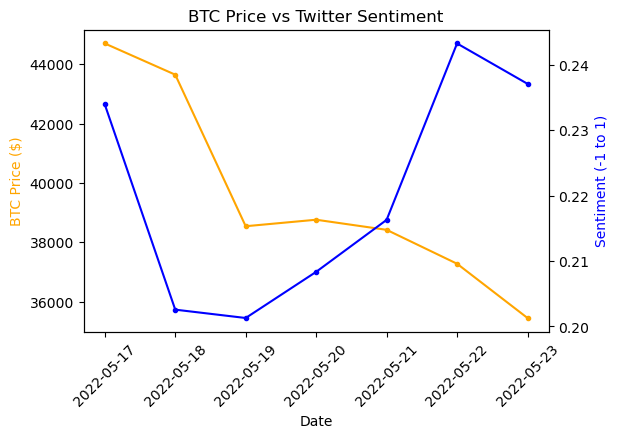

In [100]:
dates = np.sort(api["Date"].astype(str).unique())

# Combine figures into one dataframe
df = pd.DataFrame({"Date": dates, "BTC Price": avgs, "Sentiment": sents})

# Price line
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['BTC Price'], color="orange",  marker=".", ms=6)

# Sentiment line
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment'], color="blue", marker=".", ms=6)

# Formatting
plt.title("BTC Price vs Twitter Sentiment")

ax1.set_ylabel('BTC Price ($)', color="orange")
ax2.set_ylabel('Sentiment (-1 to 1)', color="blue")

ax1.set_xlabel('Date')

ax1.xaxis.set_ticks(range(7))
ax1.set_xticklabels(dates, rotation=45)

fig.set_dpi(100)


plt.show()

Seems mildly correlated?